# Y E A S T

### 'fine replicates' and their consistency 

In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
import matplotlib as m

plt.rcParams["figure.dpi"] = 300

In [2]:
# basic bayexpress functions

# calculating Bayes factors
def get_BF(N_1, n_1, N_2, n_2):

    return (sc.betaln( u_1 + n_1, u_2 + N_1 - n_1) + sc.betaln( u_1 + n_2, u_2 + N_2 - n_2) - sc.betaln( u_1 + n_1 + n_2, u_2 + N_1 - n_1 + N_2 - n_2)) / np.log(10) 

# ratio of expression 
# calculating log fold change
def get_FC(N_1, n_1, N_2, n_2):
    rate_1 = (u_1 + n_1) / (u_2 + N_1 - n_1)
    rate_2 = (u_1 + n_2) / (u_2 + N_2 - n_2)

    return np.log2(rate_2 / rate_1)

# calculating q (following Laplace's rule of succession)
def get_q(n, N):
    return (n+1)/(N+2)

# setting the priors to flat prios
u_1 = 1
u_2 = 1


# calculating Bayes factors for consistency checks

def get_BF_k1(data):
    # this range is irrelevant if we want to do all 
    k = len(data.columns)

    evidence2 = np.full(len(data), 0)

    # iterating over j until k
    for col in data.columns[1:k]: 
        n_j = data[col]
        # print(n_j, 'n_j')
        N_j = sum(data[col])
        # print(N_j, 'N_j')
        evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

    N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
    n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

    # print(n_i, 'n_i')
    # print(N, 'N')

    evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)

    return (evidence2 - evidence1) / np.log(10) 


In [3]:
# exploring 'cumulative' BF

def get_cumu_BF(data):
    out_data = pd.DataFrame({})
    for k in range(3,len(data.columns)+1):

        evidence2 = np.full(len(data), 0)

        # iterating over j until k
        for col in data.columns[1:k]: 
            n_j = data[col]
            # print(n_j, 'n_j')
            N_j = sum(data[col])
            # print(N_j, 'N_j')
            evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

        # print(n_i, 'n_i')
        # print(N, 'N')

        evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)
        
        out_data[f'{k-1}'] = (evidence2 - evidence1) / np.log(10) 

    return out_data


### CONSISTENCY TESTS

In [4]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [5]:
# calculating 'cumulatative' BF_k1

WT_cumu = get_cumu_BF(WT_yeast)

display(WT_cumu)

Snf2_cumu = get_cumu_BF(Snf2_yeast)


display(Snf2_cumu)

,2,3,4,5,6,7,8,9,10,11,...,33,34,35,36,37,38,39,40,41,42
0,-4.824123,-4.912829,-8.839685,-14.117564,-17.996641,-21.086076,-24.943705,-30.693142,-36.473404,-36.748828,...,-78.392957,-79.236264,-83.873072,-87.899103,-93.755645,-99.564530,-98.737339,-102.165373,-107.111094,-111.028167
1,-0.963656,0.632576,-4.889390,-5.707717,-1.756501,-1.034256,1.474677,-3.694451,-4.328017,30.503034,...,314.603331,332.522436,337.316054,341.359343,335.890120,333.215257,356.876602,375.089399,370.679089,365.965229
2,-5.943931,-12.083265,-18.278537,-24.465218,-30.802653,-36.940374,-42.530537,-48.629171,-54.649860,-60.521649,...,-192.140921,-198.484739,-204.355581,-210.085429,-216.320230,-222.587706,-228.790003,-234.076721,-240.250222,-246.380070
3,-4.823112,-9.807353,-15.238338,-19.905392,-24.625241,-29.785183,-34.360645,-39.709611,-44.590227,-49.889550,...,-155.375929,-160.782614,-166.296698,-171.236715,-175.771447,-179.030847,-184.072077,-188.751188,-193.899154,-199.310861
4,0.108211,10.803119,9.032746,4.700363,1.487643,-3.873543,11.533645,7.137768,1.803757,6.654632,...,249.996802,253.183338,247.773924,242.971550,239.948338,250.582110,269.366427,264.188637,259.247720,257.043307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.286567,-12.763830,-19.421876,-26.124338,-32.363821,-39.044382,-45.782284,-52.528131,-59.264657,-65.422555,...,-215.130801,-222.115884,-229.041179,-235.853189,-242.628019,-249.481368,-256.468048,-263.178684,-270.184691,-277.038617
7122,-6.531056,-12.675472,-19.165382,-25.559965,-32.208462,-38.822300,-45.496440,-51.930123,-58.585525,-65.225674,...,-209.970841,-216.538875,-223.000753,-229.707786,-235.891374,-242.622613,-249.440170,-256.071351,-262.651404,-269.387754
7123,-6.531056,-12.675472,-19.333519,-26.035980,-32.922786,-39.191373,-45.993039,-52.789226,-59.566314,-66.302507,...,-215.904536,-222.907910,-229.847933,-236.670440,-243.454560,-250.319009,-257.321064,-264.038923,-271.060168,-277.923892
7124,-6.531056,-13.174062,-20.012232,-26.815334,-33.841214,-39.875493,-46.740922,-53.587450,-60.405100,-67.173308,...,-217.027288,-224.048953,-230.003826,-236.826334,-243.610453,-250.474902,-257.476958,-264.194816,-271.216061,-277.030310


,2,3,4,5,6,7,8,9,10,11,...,35,36,37,38,39,40,41,42,43,44
0,-6.103991,-12.057457,-18.248233,-0.689254,-4.779452,-10.148008,-14.380417,-8.405656,-13.822875,-19.135557,...,58.990171,53.171198,50.286105,48.540940,67.204146,63.100998,59.969102,58.492922,55.074698,52.273279
1,-5.373082,-11.152096,-15.709169,164.012305,176.098447,175.473667,187.389002,199.129378,194.351127,194.767768,...,804.627349,799.728536,799.019121,811.207678,1011.496083,1014.180313,1037.861715,1054.538366,1059.645076,1068.603540
2,-5.776665,-11.988302,-18.045738,-24.279166,-30.448821,-36.302987,-42.457222,-48.388459,-54.694911,-60.979764,...,-209.316343,-214.850561,-220.739455,-226.997613,-232.939793,-239.278730,-245.600999,-251.971431,-257.999634,-264.347894
3,-4.971297,-9.804811,-14.992280,-19.330740,-24.753763,-29.744215,-34.505353,-38.882697,-44.050455,-49.311961,...,-155.746721,-161.075340,-166.370178,-170.515722,-175.754308,-181.035691,-186.357233,-191.677668,-196.533408,-201.913097
4,-0.576562,-5.754128,-6.633886,15.230201,10.031782,15.283111,17.306187,20.515392,18.416235,13.685228,...,321.437539,316.081994,316.897201,329.751911,485.680806,480.472207,476.587686,482.279438,477.098099,473.797677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.404911,-13.017210,-19.762178,-26.456642,-33.341253,-39.530966,-46.347490,-53.129063,-59.979981,-66.750607,...,-230.114841,-236.079392,-242.999319,-249.784977,-256.694193,-263.577612,-270.417138,-275.356707,-281.477286,-287.490152
7122,-6.672068,-12.950527,-19.695495,-25.231652,-31.904670,-38.586324,-45.341319,-52.078137,-58.880708,-65.618429,...,-222.528536,-228.875641,-235.353807,-242.033736,-248.799687,-255.553666,-262.281139,-269.041926,-275.805506,-282.046301
7123,-6.672068,-13.449795,-20.336202,-27.102349,-34.092758,-40.946441,-47.886024,-54.757106,-61.704721,-67.404270,...,-229.953348,-236.815191,-243.748169,-250.542638,-257.463792,-264.357998,-271.206862,-278.100616,-284.993383,-291.816655
7124,-6.334297,-12.946597,-19.691564,-26.386028,-33.270640,-40.066980,-46.945034,-53.063258,-59.914177,-66.684802,...,-228.743133,-234.775721,-241.682596,-248.459444,-255.356721,-262.229353,-269.059542,-275.932839,-282.805731,-289.612759


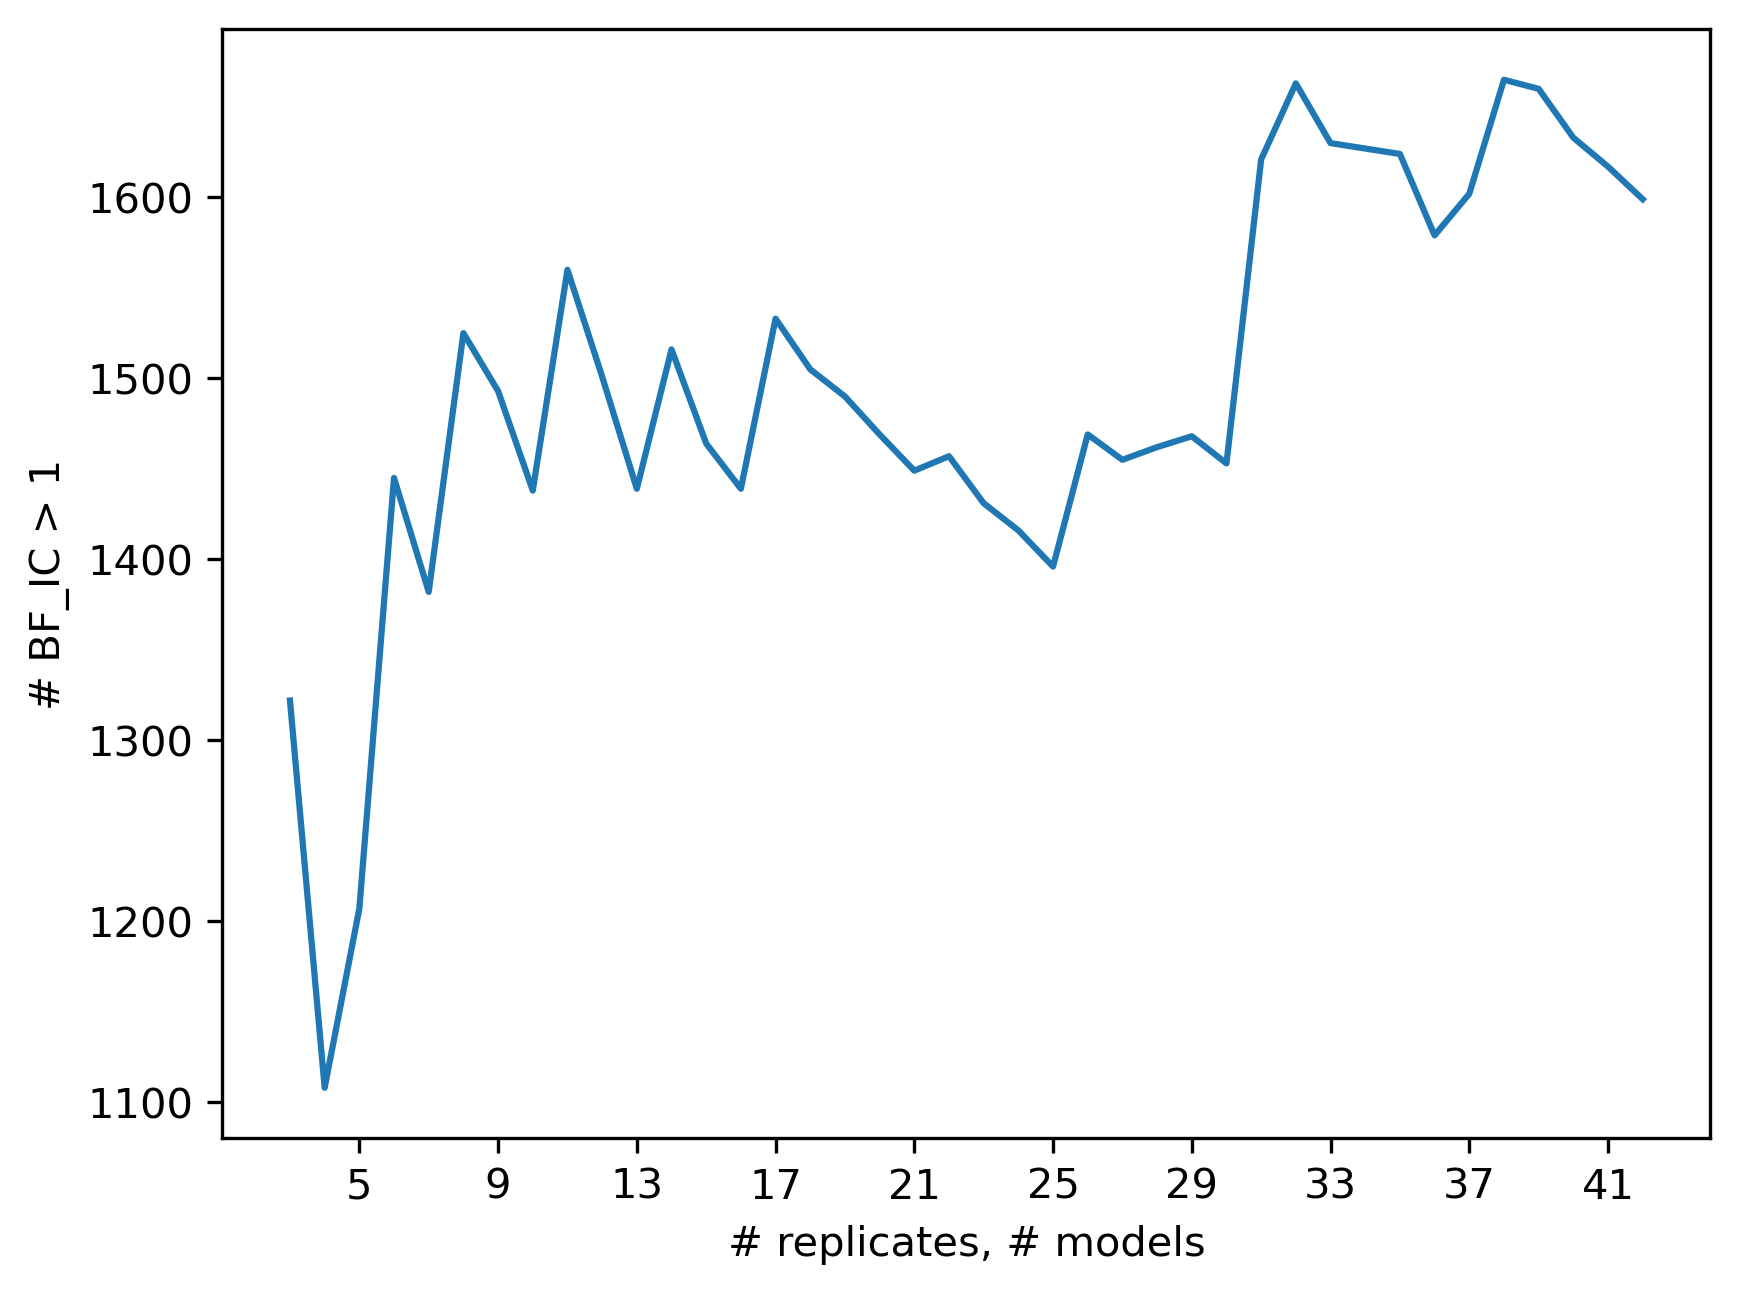

In [6]:
# this is the general idea

# finding the number of genes with BF_IC > 1 while increasing number of reps
series = (WT_cumu.iloc[:,1:] > 1).sum()

series.plot(xlabel='# replicates, # models', ylabel='# BF_IC > 1', xticks=range(2,len(series),4), legend=False)


plt.show()

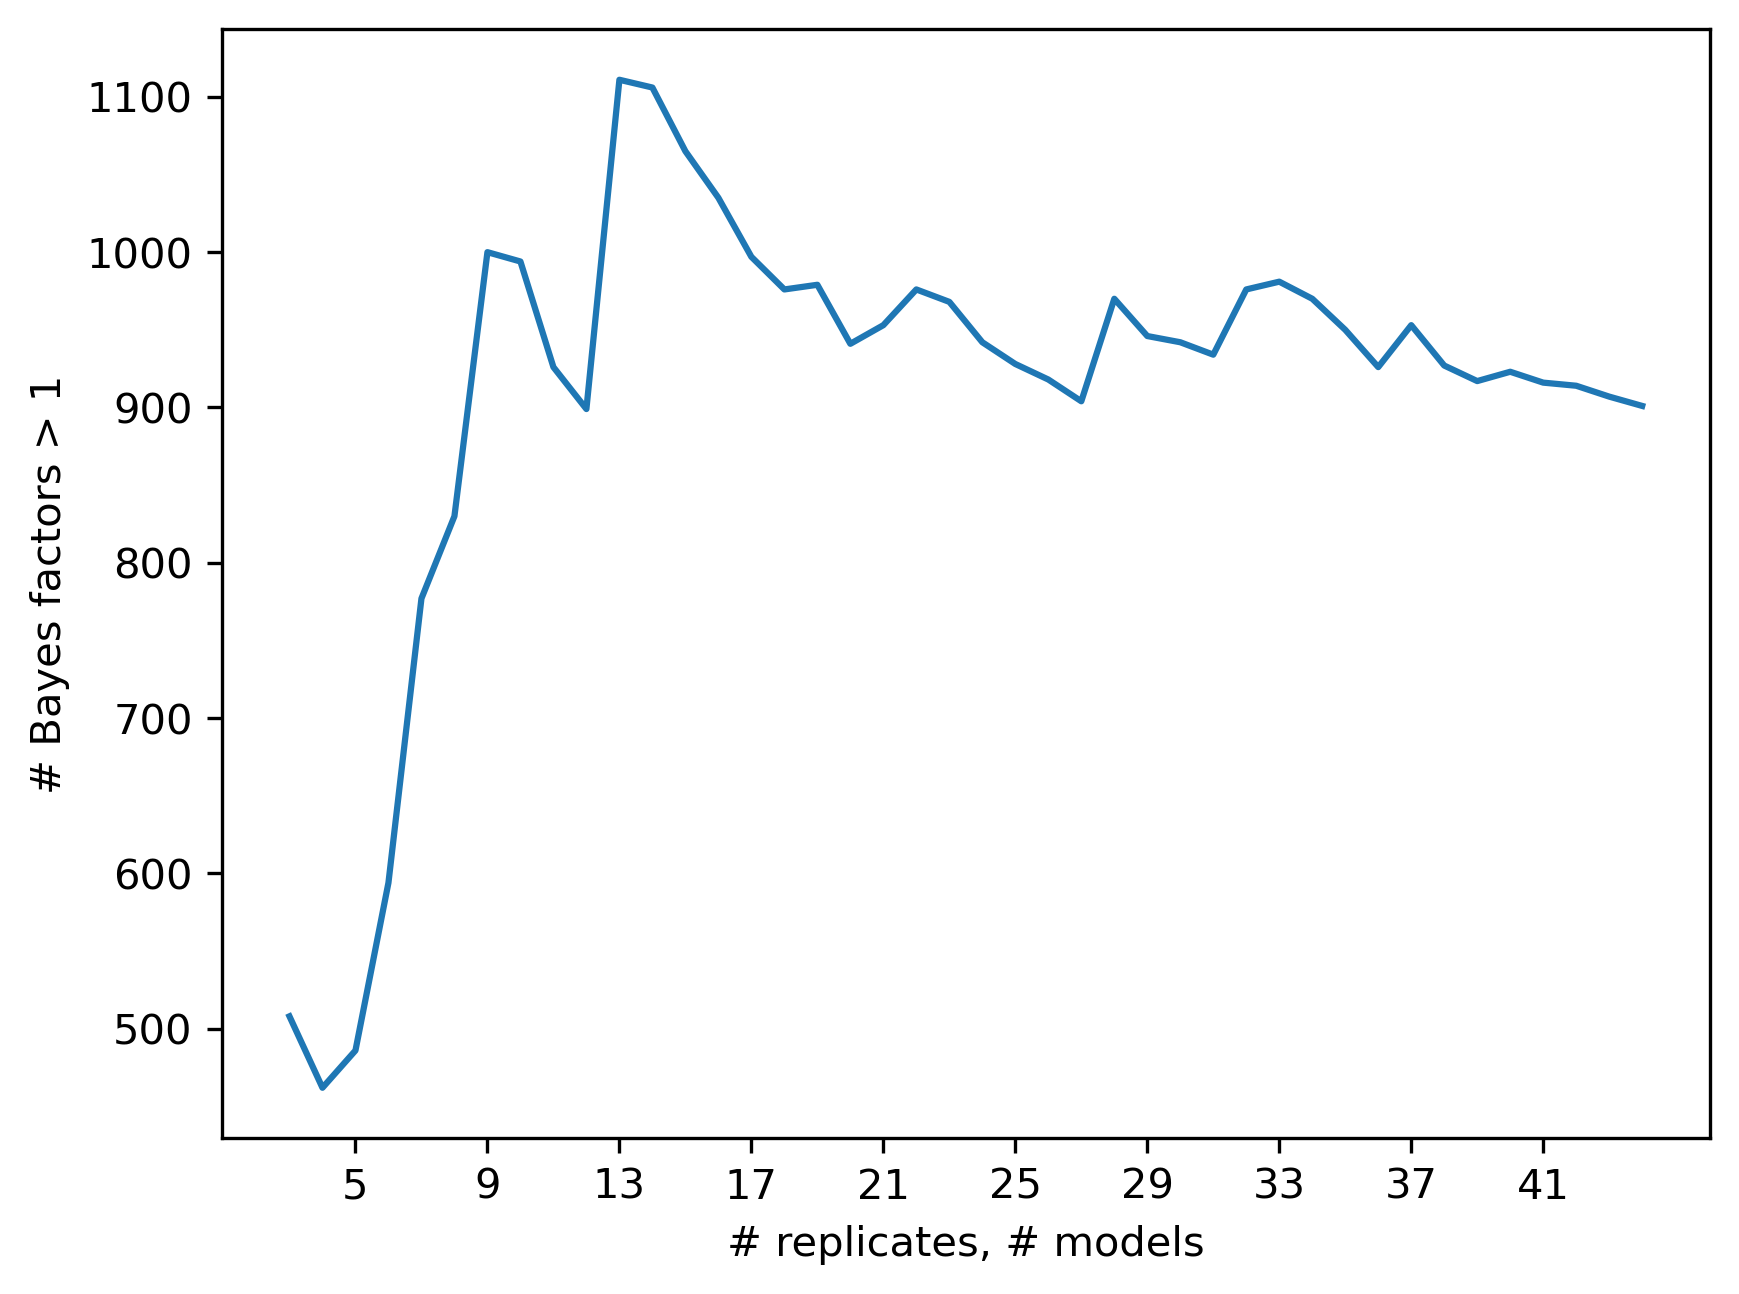

In [7]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (Snf2_cumu.iloc[:,1:] > 1).sum()


series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)

plt.show()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,1373,355,1336,1168,2857,1763,112,205,1615,1473,965,1265,1355,1178,1232,429,737,906,644,869
3,1406,2312,1257,2088,2503,1770,727,1639,1422,1627,1981,1403,1547,1279,1908,1197,1776,627,877,889
4,1254,2624,1228,1702,2065,1650,997,1463,1415,1995,2588,1349,1447,1275,1535,1550,1477,1238,881,1131
5,1119,2240,1166,1735,2194,1540,1455,1523,1559,1760,2410,1420,1332,1334,1319,1537,2203,1186,763,1332
6,1144,2029,1315,2027,2010,1558,1319,1468,1527,1591,2119,1395,1378,1180,1485,1499,1992,1287,969,1244
7,1480,1880,1314,1919,1869,1468,1552,1445,1640,1716,1923,1241,1272,1167,1725,1504,1812,1489,944,1380
8,1435,1858,1780,1865,1958,1413,1526,1403,1819,1709,1755,1246,1367,1630,1868,1518,1697,1417,1256,1309
9,1740,1847,1800,1795,2072,1352,1459,1302,1962,1743,1766,1222,1491,1626,1777,1434,1663,1435,1454,1293
10,1665,1762,1753,1843,2303,1501,1453,1271,1876,1653,1833,1251,1481,1525,1710,1384,1745,1543,1387,1530
11,1739,1734,1665,1815,2207,1575,1442,1412,1776,1624,1873,1251,1433,1535,1671,1348,1634,1484,1332,1460


<Axes: xlabel='# replicates', ylabel='# BF_IC > 1 of 7126 genes'>

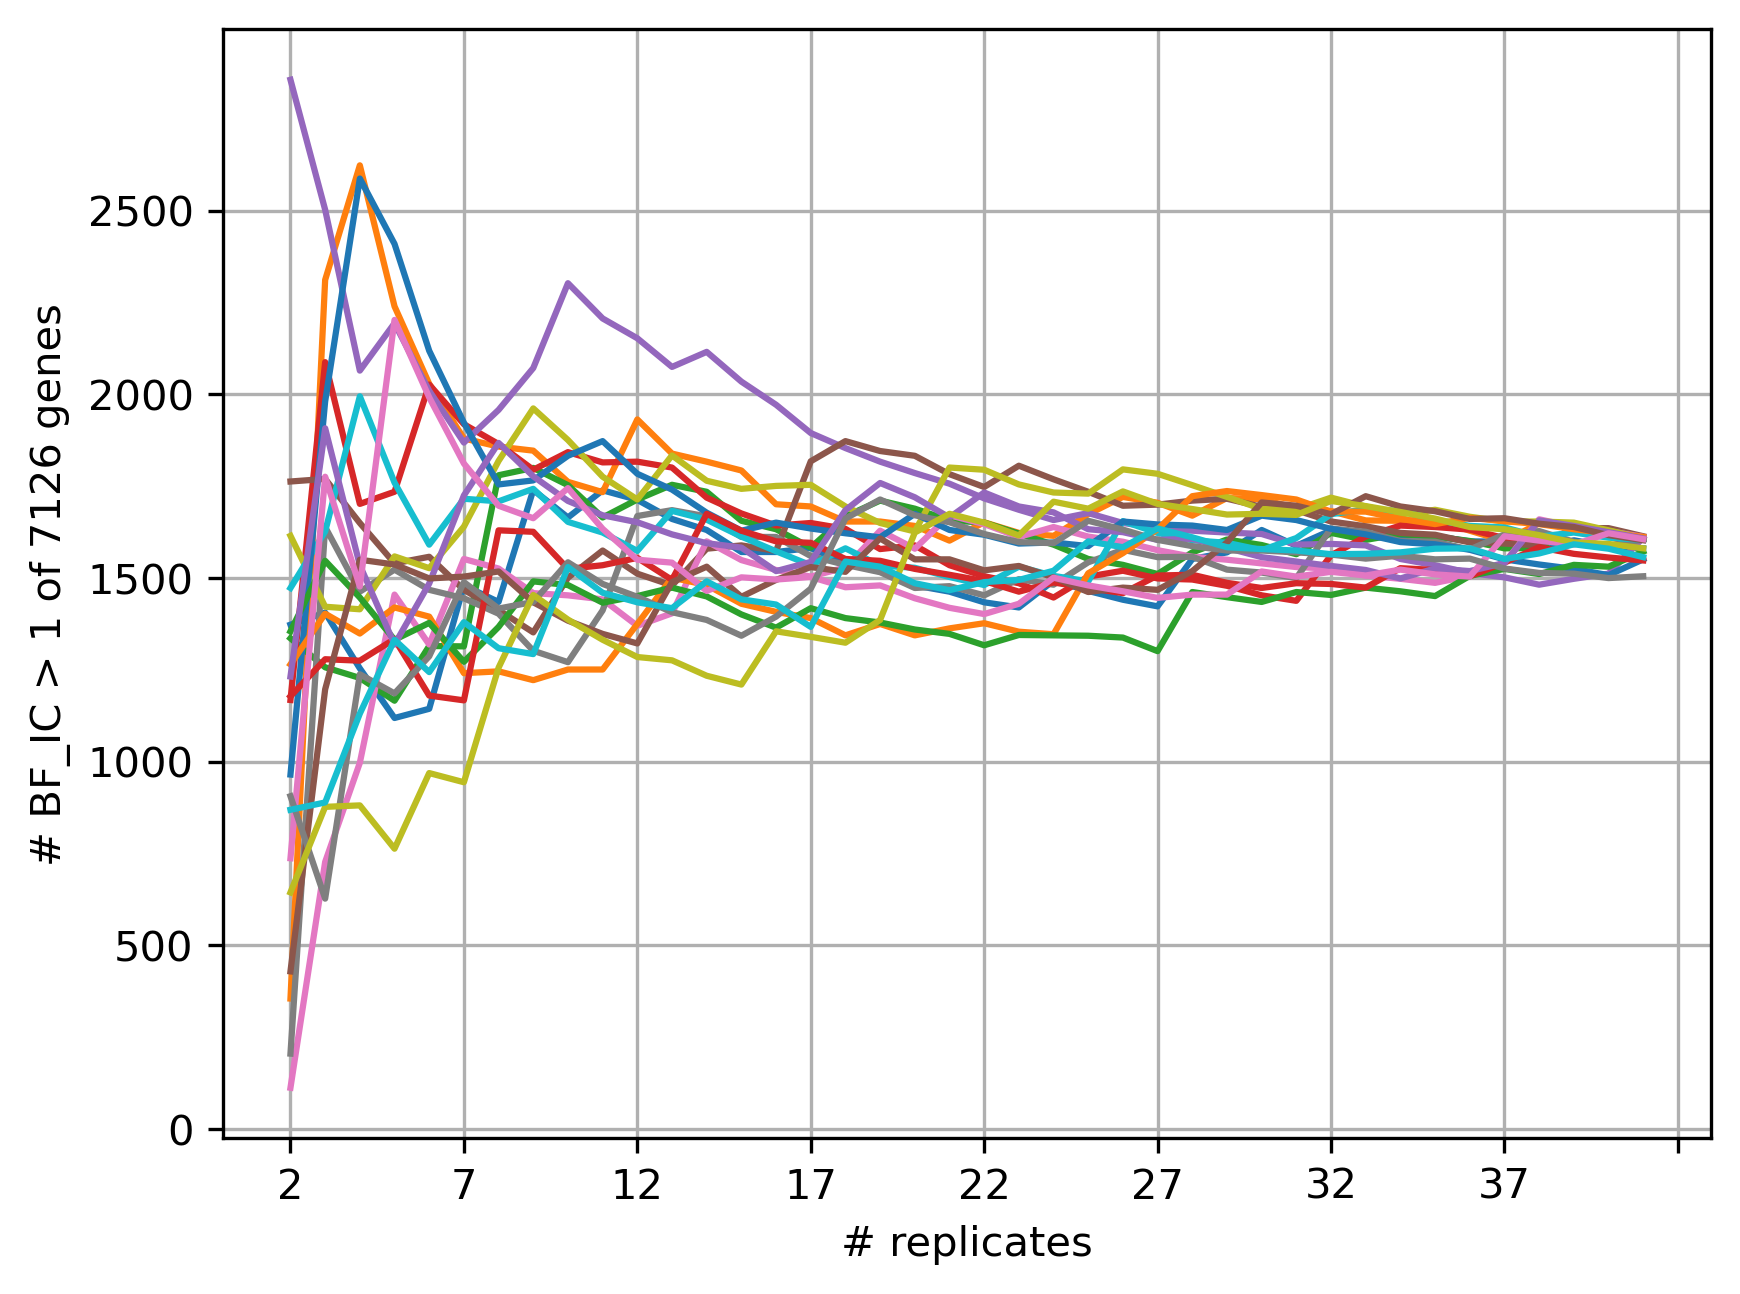

In [8]:
# then bootstrapping this idea
# 20 times for figure

WT_cons_it = pd.DataFrame({})
# let's do this with more iterations
# WT_AOTP = []

for i in range(20):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_IC = get_cumu_BF(WT_yeast[col_order])
    # WT_AOTP.append(WT_yeast.loc[(cumu_BF_IC).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_BF_IC) > 1).sum()

display(WT_cons_it)

display(WT_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates',
                        ylabel='# BF_IC > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,3016,1075,1628,537,1628,542,921,1289,2234,985,...,1557,576,1418,1011,1453,819,1787,2664,176,1032
3,3024,928,1330,645,1247,694,887,1229,1759,1652,...,1517,470,1615,1624,1861,863,1623,2208,914,988
4,2505,972,1224,1421,997,664,1475,1396,1642,1528,...,1822,419,1366,1629,1732,1401,2323,1723,1189,819
5,2461,1521,1047,1323,1362,621,1565,1668,1788,1421,...,1774,366,1247,1565,1558,1364,2032,1786,1077,764
6,2345,1365,1490,1296,1399,908,1519,1727,1681,1846,...,1632,344,1592,1475,1431,1483,1872,1588,1159,767
7,2197,1436,1428,1217,1314,1791,1522,1588,1551,1687,...,1580,1225,1449,1415,1429,1478,1905,1646,1381,801
8,2180,1755,1321,1304,1339,1704,1489,1763,1729,1575,...,1565,1375,1384,1320,1353,1408,1760,1624,1611,858
9,2069,2242,1280,1328,1376,1643,1618,1944,1668,1516,...,1491,1279,1393,1378,1344,1425,1965,1588,1522,873
10,2048,2353,1249,1314,1318,1842,1608,1864,1623,1444,...,1513,1408,1392,1806,1607,1405,1854,1555,1507,817
11,1971,2277,1292,1289,1253,1936,1545,1747,1597,1350,...,1476,1385,1295,1738,1702,1341,1718,1472,1477,765


<Axes: xlabel='# replicates', ylabel='# BF_IC > 1 of 7126 genes'>

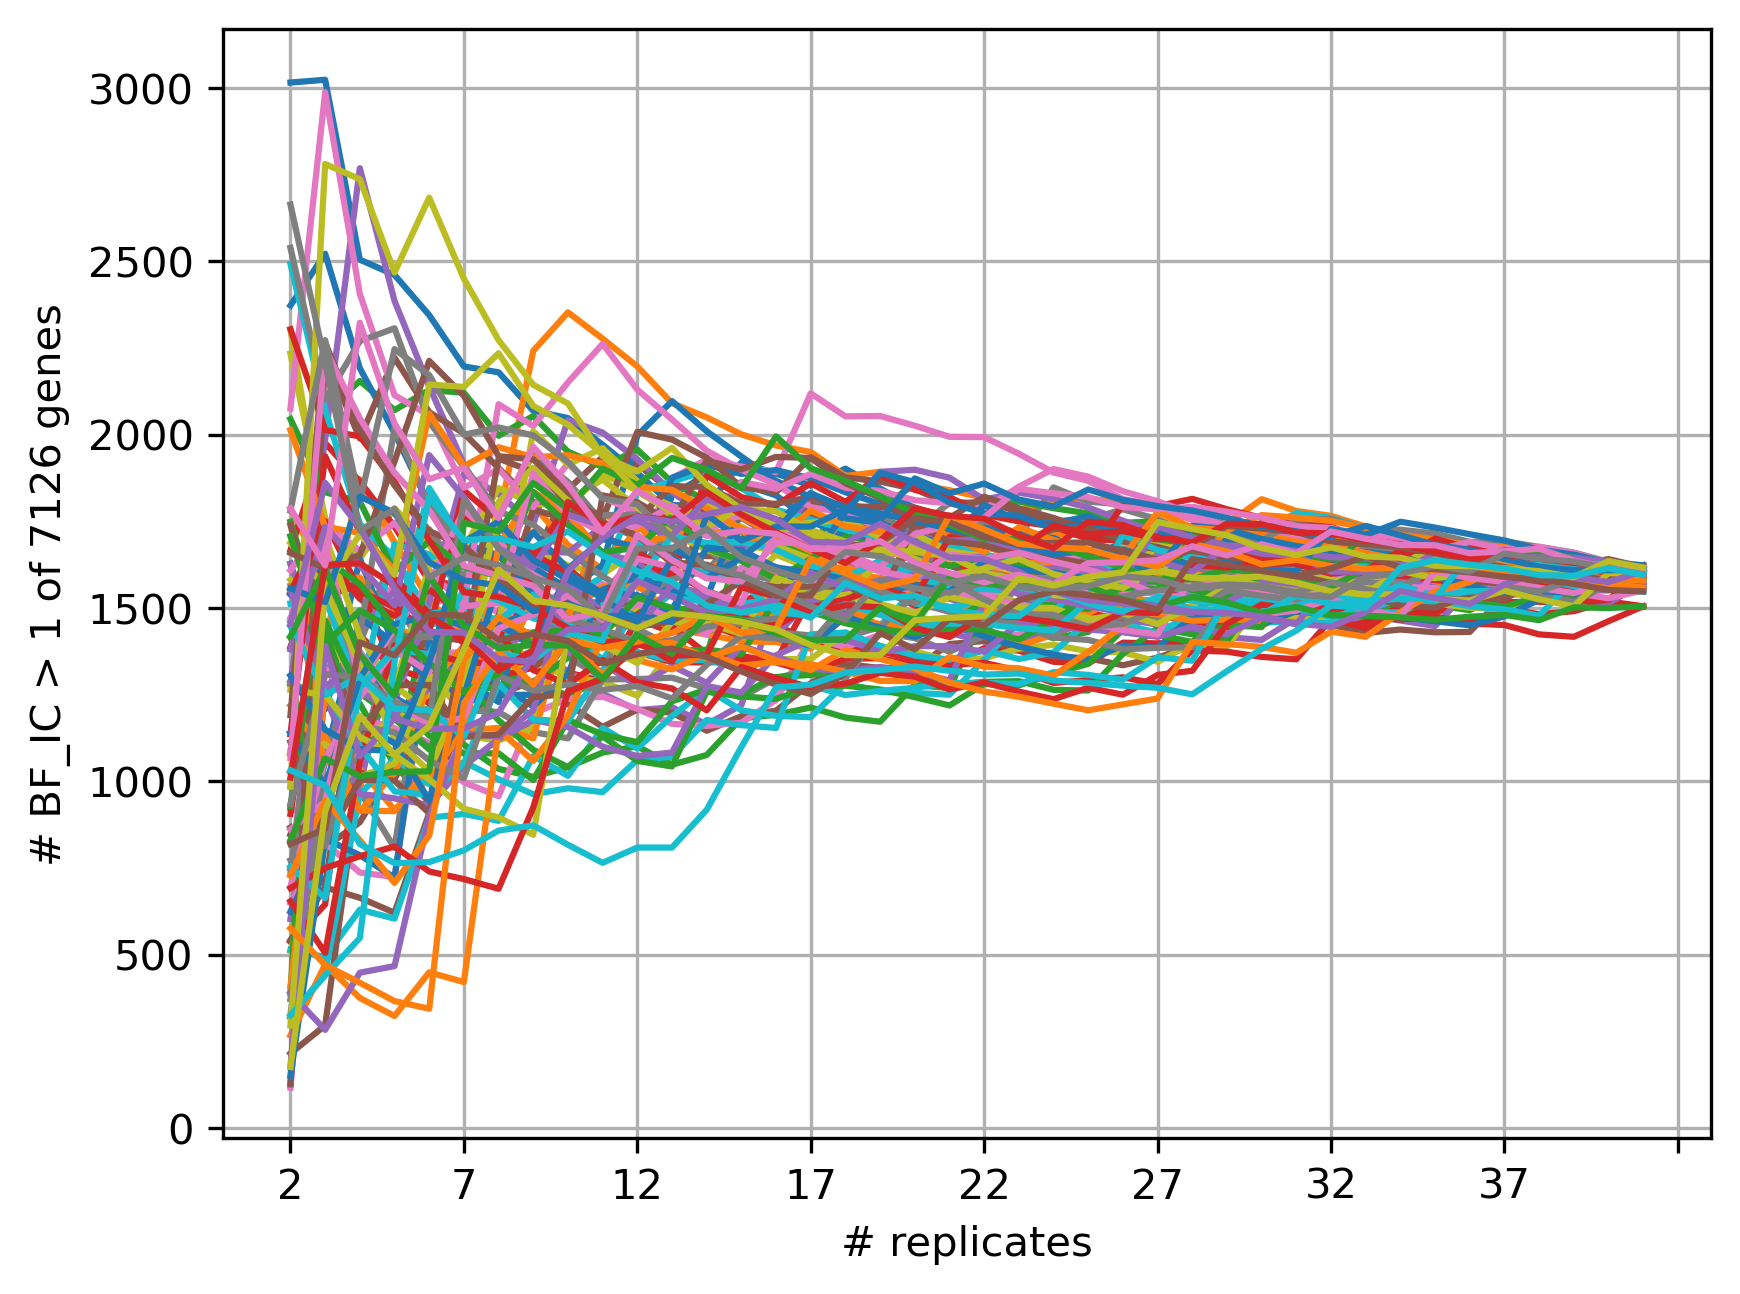

In [9]:
# then bootstrapping this idea
# 100 times for identifying genes

WT_cons_it = pd.DataFrame({})
WT_AOTP = []

for i in range(100):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_IC = get_cumu_BF(WT_yeast[col_order])
    WT_AOTP.append(WT_yeast.loc[(cumu_BF_IC).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_BF_IC) > 1).sum()

display(WT_cons_it)

display(WT_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates',
                        ylabel='# BF_IC > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,492,287,573,1641,593,1165,1246,1801,218,443,886,248,379,712,516,394,300,819,474,77
3,287,494,1494,1496,492,934,1532,1329,463,349,763,502,866,648,799,512,984,708,470,217
4,227,474,1116,1322,897,1074,1364,1134,381,485,814,595,751,797,658,413,1186,583,835,487
5,426,590,928,1287,866,1024,1245,1124,689,423,857,758,620,1506,618,446,1081,523,708,443
6,390,585,1330,1113,836,1028,1180,1005,808,458,1071,677,659,1338,717,414,1016,529,648,447
7,431,590,1338,970,815,951,1044,1047,1154,506,1122,695,642,1182,709,496,948,573,610,518
8,731,604,1186,879,854,938,931,935,1153,739,1070,688,585,1049,667,464,884,546,669,510
9,759,671,1182,796,817,874,1071,1032,1288,752,936,691,626,971,615,489,920,834,712,659
10,744,631,1097,774,842,838,1114,1039,1212,744,976,694,694,914,576,584,900,898,675,619
11,726,651,1182,758,805,814,1094,1035,1172,740,963,704,670,904,581,601,858,861,708,625


<Axes: xlabel='# replicates', ylabel='# BF_IC > 1 of 7126 genes'>

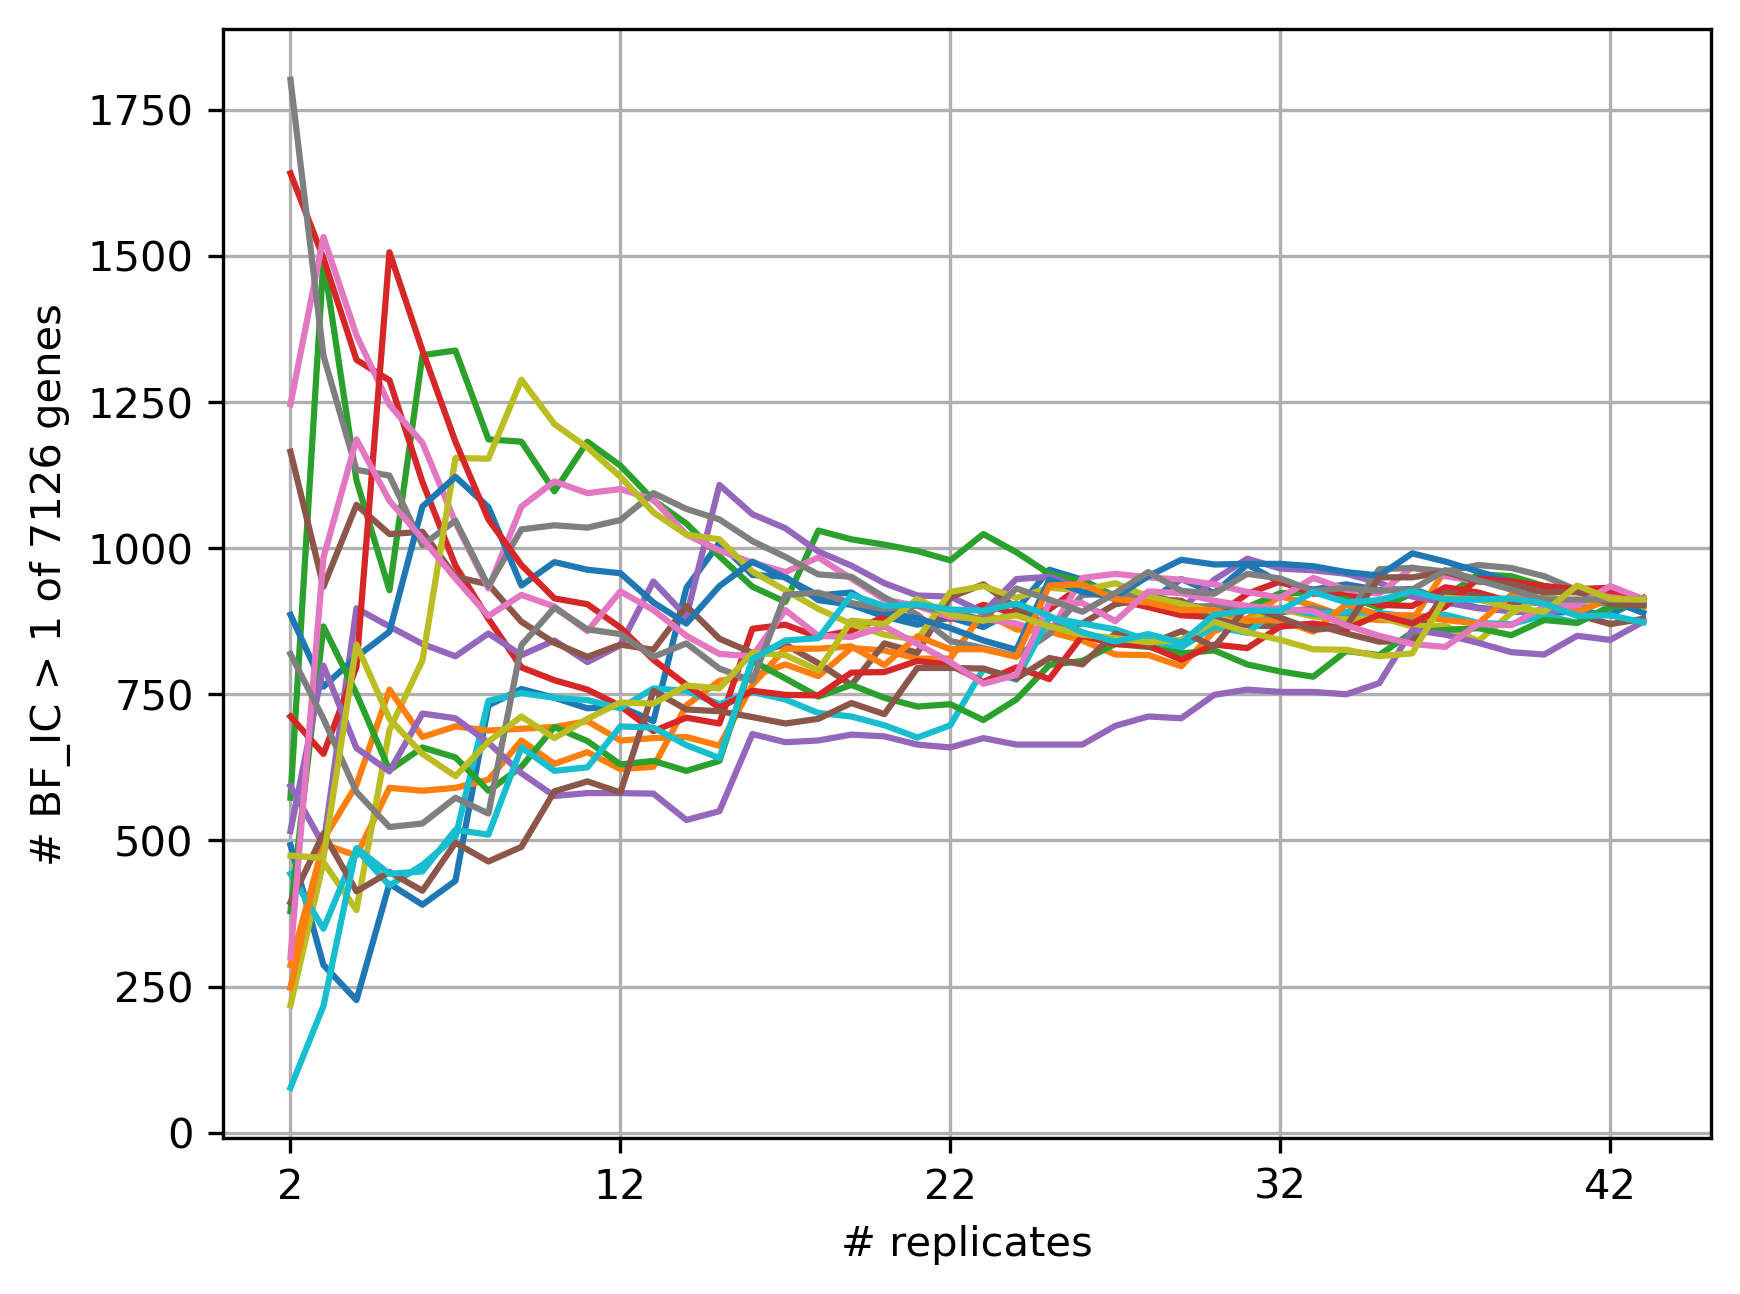

In [10]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
# Snf2_AOTP = []
# lets do this with more iterations

for i in range(20):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_IC = get_cumu_BF(Snf2_yeast[col_order])
    # Snf2_AOTP.append(Snf2_yeast.loc[(cumu_BF_IC).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_BF_IC) > 1).sum()

display(Snf2_cons_it)

display(Snf2_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates',
                        ylabel='# BF_IC > 1 of 7126 genes'
                        ))

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,178,359,486,943,632,426,573,914,825,943,...,496,354,735,825,1011,409,329,559,2492,366
3,510,438,1496,952,571,635,568,888,1183,1548,...,1262,767,784,970,870,473,467,538,1974,482
4,725,495,1114,718,570,552,604,1266,1048,1365,...,1337,760,686,984,788,498,582,552,1821,388
5,614,597,1077,616,549,605,886,1170,946,1073,...,1147,881,680,1103,920,578,560,546,1651,1095
6,647,587,1126,570,489,587,764,1123,1424,1019,...,1693,907,1073,918,780,939,516,550,1596,976
7,655,608,1134,587,522,781,771,1265,1412,1088,...,1464,1060,932,1019,758,829,567,690,1641,882
8,713,584,1220,598,539,723,748,1173,1503,1067,...,1355,1269,1036,1001,869,904,570,654,1504,1030
9,667,600,1123,649,938,695,712,1239,1388,1175,...,1280,1154,1155,967,1012,869,639,666,1420,1016
10,664,654,1248,624,903,847,813,1127,1479,1210,...,1166,1160,1108,1211,972,862,657,700,1403,929
11,654,992,1198,733,896,817,793,1094,1380,1144,...,1064,1115,1026,1288,1110,1136,649,697,1304,951


<Axes: xlabel='# replicates', ylabel='# BF_IC > 1 of 7126 genes'>

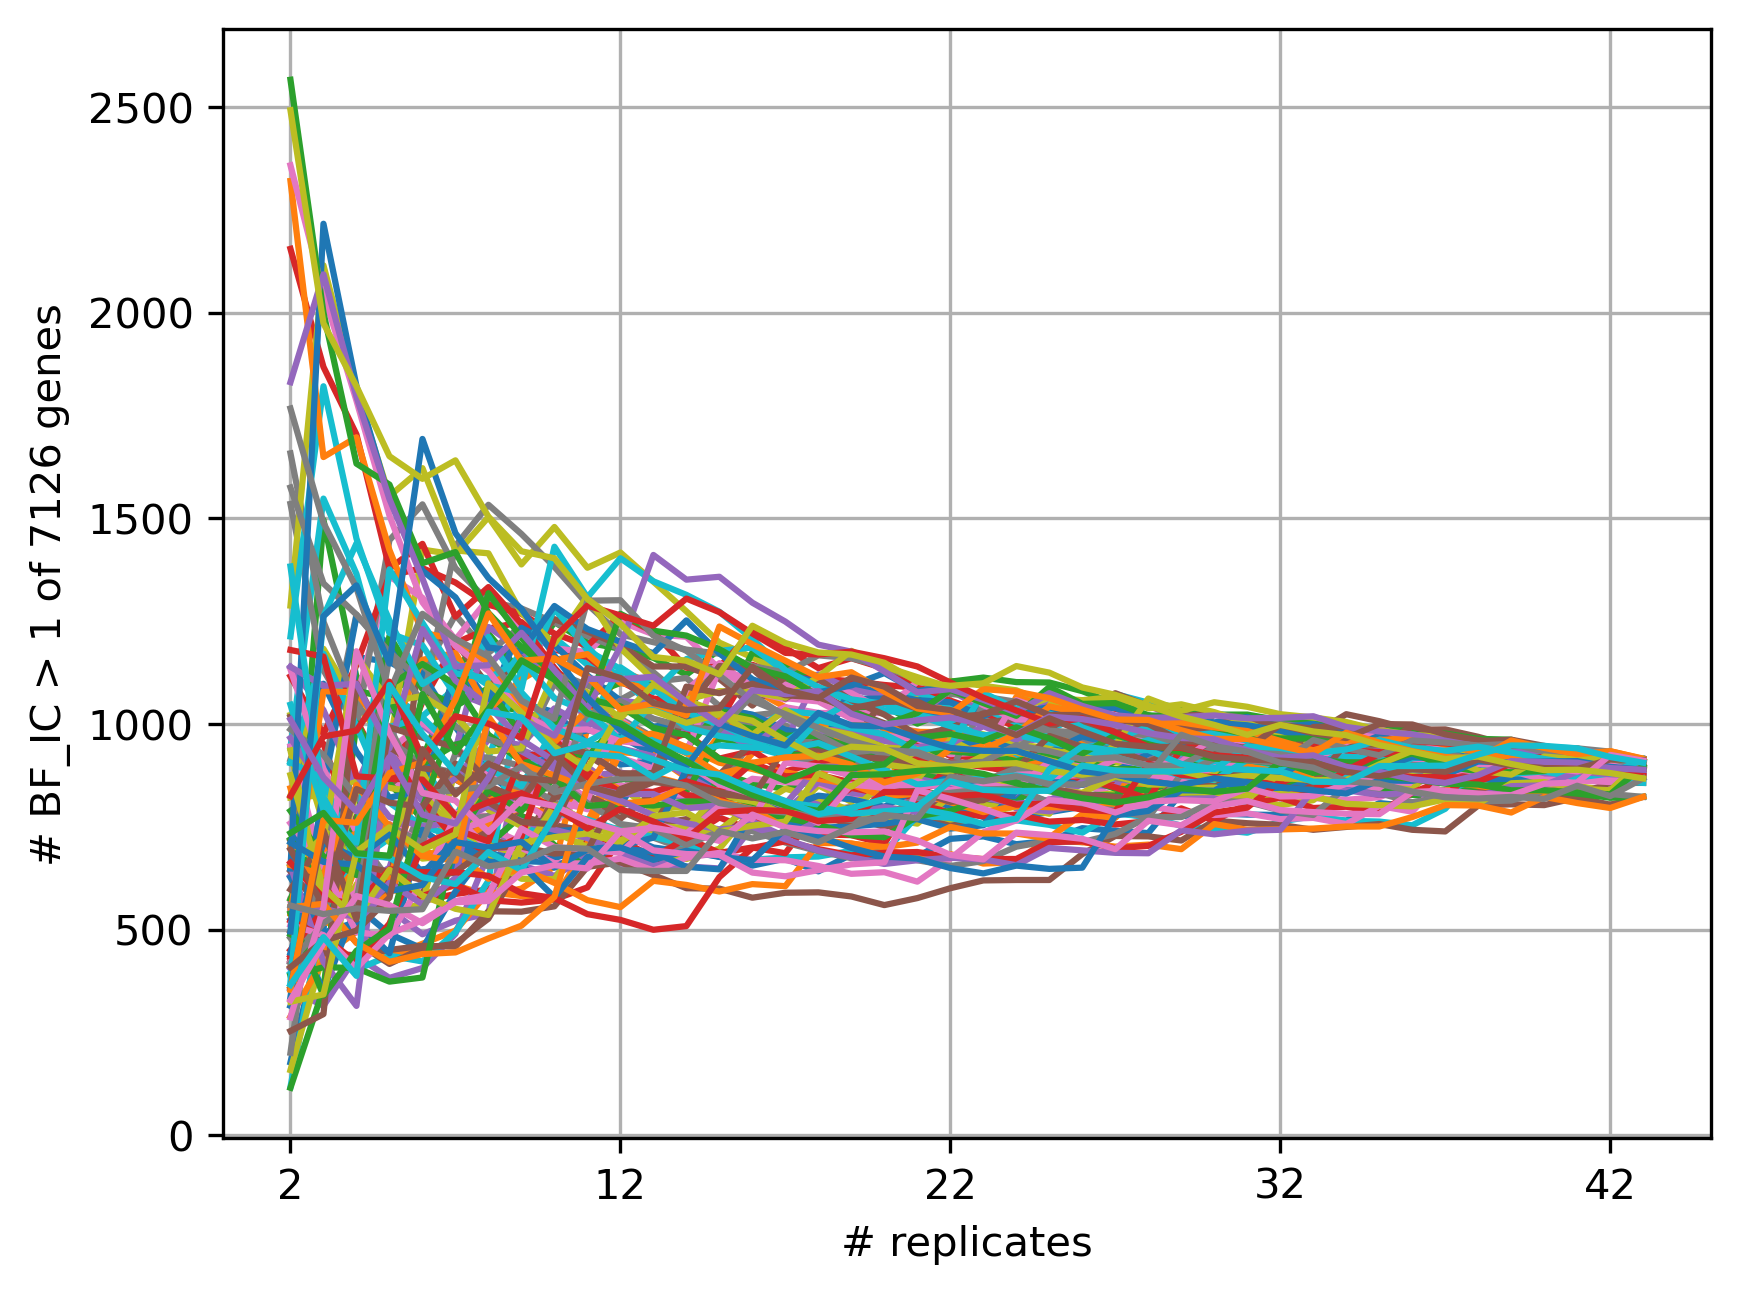

In [11]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
Snf2_AOTP = []

for i in range(100):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_IC = get_cumu_BF(Snf2_yeast[col_order])
    Snf2_AOTP.append(Snf2_yeast.loc[(cumu_BF_IC).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_BF_IC) > 1).sum()

display(Snf2_cons_it)

display(Snf2_cons_it.plot(legend=False, grid=True,
                        xlabel='# replicates',
                        ylabel='# BF_IC > 1 of 7126 genes'
                        ))

In [12]:
# Checking for overlaps in Snf2_AOTP

# Convert each inner list to a set
sets = [set(lst) for lst in Snf2_AOTP]

print('# genes with BF_IC > 1 for all replicates throughout the iterations')
for lst in Snf2_AOTP:
    print(len(lst))

# Find the intersection of all sets
Snf2_overlap = set.intersection(*sets)

# Print the Snf2_overlap
print('overlap: ', len(Snf2_overlap))
# print(Snf2_overlap)


# Find the union of all sets
Snf2_union = set.union(*sets)

# Print the union
# print(Snf2_union)
print('union: ', len(Snf2_union))


# genes with BF_IC > 1 for all replicates throughout the iterations
879
889
914
884
911
897
914
907
915
900
873
915
912
907
894
911
912
872
914
912
911
916
914
914
901
857
899
901
913
899
907
902
897
912
912
895
911
911
873
857
906
903
873
901
901
823
874
914
905
896
907
901
823
896
879
898
914
823
911
900
911
895
898
912
911
905
901
912
914
907
907
823
913
895
874
900
910
911
905
912
914
910
912
912
911
913
898
897
912
914
889
915
899
874
889
912
911
868
868
906
overlap:  758
union:  922


In [13]:
# Checking for overlaps in WT_AOTP

# Convert each inner list to a set
sets = [set(lst) for lst in WT_AOTP]

print('# genes with BF_IC > 1 for all replicates throughout the iterations')
for lst in WT_AOTP:
    print(len(lst))

# Find the intersection of all sets
WT_overlap = set.intersection(*sets)

# Print the WT_overlap
print('overlap: ', len(WT_overlap))
# print(WT_overlap)


# Find the union of all sets
WT_union = set.union(*sets)

# Print the union
# print(WT_union)
print('union: ', len(WT_union))


# genes with BF_IC > 1 for all replicates throughout the iterations
1611
1608
1580
1505
1572
1608
1597
1611
1610
1614
1604
1603
1548
1618
1557
1598
1606
1610
1613
1610
1594
1572
1610
1610
1572
1580
1610
1580
1610
1617
1612
1596
1557
1505
1611
1608
1551
1610
1623
1597
1608
1605
1615
1610
1572
1618
1606
1611
1611
1607
1596
1608
1607
1596
1613
1623
1623
1612
1617
1548
1607
1608
1610
1594
1617
1611
1604
1623
1613
1548
1604
1608
1608
1604
1615
1559
1611
1557
1617
1604
1623
1580
1608
1618
1617
1615
1551
1612
1596
1608
1610
1559
1505
1596
1606
1548
1604
1597
1617
1596
overlap:  1412
union:  1632


In [14]:
RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

RALL_bayexpress

,locus_name,BF,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
2,HRA1,-5.206545,-0.564787
3,ICR1,76.746125,0.504048
4,LSR1,0.451012,0.120243
...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839
7122,tY(GUA)M1,-7.406574,0.022303
7123,tY(GUA)M2,-7.727890,0.183767
7124,tY(GUA)O,-7.622253,0.347266


In [15]:
# let's see what those AOTP genes are

display(RALL_bayexpress.iloc[list(WT_union)])
display(RALL_bayexpress.iloc[list(Snf2_union)])

# hmm interesting

,locus_name,BF,FC
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
56,RUF5-1,-1.191579,0.080133
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
...,...,...,...
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050
4085,YLL008W,1202.946112,-0.845752


In [16]:
# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1])
display(RALL_bayexpress.iloc[list(Snf2_union)].loc[RALL_bayexpress.BF > 1])

# hmm interesting

,locus_name,BF,FC
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
58,SCR1,10.530223,0.125605
59,SRG1,365.733360,-0.939803
60,TLC1,777.763124,0.472738
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF,FC
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
4105,YLL026W,6986.693811,-0.641283
4118,YLL039C,533.296466,0.257212
4120,YLL041C,3.231386,0.060734
...,...,...,...
4060,YKR091W,757.902699,-0.557891
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050


In [17]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


WT_yeast_avq.to_csv('WT_yeast_avq.csv')
Snf2_yeast_avq.to_csv('Snf2_yeast_avq.csv')

,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [19]:
RALL_bayexpress['BF_k1_WT'] = get_BF_k1(WT_yeast.iloc[:,1:])
RALL_bayexpress['AOTP_WT'] = RALL_bayexpress.index.isin(WT_union)

RALL_bayexpress['BF_k1_Snf2'] = get_BF_k1(Snf2_yeast.iloc[:,1:])
RALL_bayexpress['AOTP_Snf2'] = RALL_bayexpress.index.isin(Snf2_union)

display(RALL_bayexpress)
RALL_bayexpress.to_csv('RALL_bayexpress.csv')

,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


# How many genes would be marked as not consistent?

In [20]:
display((RALL_bayexpress.BF_k1_WT > 1).describe())

display((RALL_bayexpress.BF_k1_Snf2 > 1).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) & (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) | (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())



count      7126
unique        2
top       False
freq       5524
Name: BF_k1_WT, dtype: object

count      7126
unique        2
top       False
freq       6223
Name: BF_k1_Snf2, dtype: object

count      7126
unique        2
top       False
freq       6359
dtype: object

count      7126
unique        2
top       False
freq       5388
dtype: object

In [21]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q.to_csv('WT_yeast_q.csv')

WT_yeast_q

,39_q,33_q,2_q,40_q,36_q,13_q,23_q,16_q,35_q,29_q,...,38_q,19_q,31_q,37_q,7_q,34_q,42_q,22_q,14_q,24_q
0,1.727728e-07,1.349760e-07,1.647548e-06,4.120753e-06,6.830799e-07,1.651220e-06,8.124501e-06,5.386557e-06,1.002461e-06,1.578264e-06,...,1.603579e-06,2.573225e-06,1.816573e-07,1.810945e-06,3.385883e-07,4.192114e-06,6.252496e-07,7.542872e-07,1.353193e-06,1.042284e-06
1,1.900501e-06,1.484737e-06,9.758554e-06,2.866611e-05,4.235095e-06,4.513335e-06,3.823932e-05,3.986052e-05,5.012305e-06,1.167915e-05,...,7.277780e-06,9.649594e-06,2.724860e-06,1.101658e-05,4.175923e-06,2.305663e-05,8.878545e-06,5.908583e-06,7.910972e-06,5.732564e-06
2,2.591592e-07,8.098563e-07,3.802034e-07,1.074979e-06,8.196959e-07,3.302440e-07,3.249800e-07,1.795519e-07,7.017227e-07,6.313054e-07,...,3.700566e-07,4.288709e-07,4.541433e-07,4.527362e-07,5.643139e-07,3.353691e-07,2.500999e-07,7.542872e-07,5.204587e-07,2.084569e-07
3,1.235325e-05,1.160794e-05,1.571507e-05,1.702050e-05,1.625730e-05,1.398033e-05,1.213259e-05,1.274819e-05,1.383396e-05,1.188959e-05,...,1.011488e-05,1.275891e-05,1.017281e-05,1.720398e-05,1.354353e-05,1.492393e-05,1.338034e-05,1.470860e-05,1.634240e-05,1.396661e-05
4,9.502503e-06,9.043395e-06,2.078445e-05,2.382870e-05,2.049240e-05,2.201627e-05,4.354733e-05,5.655885e-05,2.335734e-05,2.788266e-05,...,1.011488e-05,1.254447e-05,9.173695e-06,1.735489e-05,2.200824e-05,3.236312e-05,1.613144e-05,1.760003e-05,1.374011e-05,2.105414e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,8.638639e-08,1.349760e-07,2.534689e-07,1.791632e-07,1.366160e-07,1.100813e-07,1.083267e-07,1.795519e-07,1.002461e-07,1.052176e-07,...,1.233522e-07,1.072177e-07,9.082867e-08,1.509121e-07,1.128628e-07,8.384228e-08,1.250499e-07,1.257145e-07,1.040917e-07,1.042284e-07
7122,8.638639e-08,1.349760e-07,1.267345e-07,1.791632e-07,1.366160e-07,1.100813e-07,1.083267e-07,1.795519e-07,2.004922e-07,1.052176e-07,...,1.233522e-07,1.072177e-07,9.082867e-08,3.018241e-07,1.128628e-07,1.676846e-07,1.250499e-07,2.514291e-07,1.040917e-07,2.084569e-07
7123,8.638639e-08,1.349760e-07,1.267345e-07,1.791632e-07,1.366160e-07,1.100813e-07,1.083267e-07,1.795519e-07,1.002461e-07,1.052176e-07,...,1.233522e-07,1.072177e-07,9.082867e-08,1.509121e-07,2.257256e-07,8.384228e-08,1.250499e-07,1.257145e-07,1.040917e-07,1.042284e-07
7124,8.638639e-08,1.349760e-07,1.267345e-07,1.791632e-07,1.366160e-07,1.100813e-07,1.083267e-07,1.795519e-07,2.004922e-07,1.052176e-07,...,1.233522e-07,1.072177e-07,9.082867e-08,1.509121e-07,2.257256e-07,8.384228e-08,2.500999e-07,2.514291e-07,1.040917e-07,1.042284e-07


In [22]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q.to_csv('Snf2_yeast_q.csv')

Snf2_yeast_q

,43_q,27_q,41_q,16_q,36_q,13_q,31_q,35_q,22_q,1_q,...,3_q,29_q,42_q,32_q,8_q,19_q,6_q,37_q,34_q,24_q
0,7.991772e-07,4.152554e-06,4.451590e-06,2.273210e-06,1.934424e-06,9.497976e-07,8.953913e-07,5.269065e-07,7.894240e-06,4.888009e-07,...,6.839056e-07,4.247007e-07,4.541140e-07,4.463240e-07,2.992327e-07,2.203145e-06,4.807801e-07,7.028538e-07,3.567655e-07,1.205007e-06
1,5.137568e-06,2.366956e-05,2.988925e-05,9.930340e-06,9.672119e-06,4.748988e-06,5.148500e-06,4.281115e-06,3.114636e-05,3.128326e-06,...,2.735623e-06,3.079080e-06,2.724684e-06,3.459011e-06,1.396419e-06,9.337138e-06,2.884681e-06,6.827723e-06,2.259515e-06,7.832543e-06
2,1.141682e-07,2.768369e-07,3.815649e-07,4.785706e-07,7.254089e-07,2.374494e-07,3.357717e-07,3.951799e-07,4.305949e-07,5.865611e-07,...,4.559371e-07,5.308759e-07,3.405855e-07,3.347430e-07,4.987212e-07,6.294700e-07,1.602600e-07,1.004077e-07,7.135311e-07,6.025033e-07
3,2.237696e-05,1.716389e-05,1.895106e-05,2.141604e-05,1.886063e-05,1.733381e-05,1.712436e-05,1.890277e-05,1.901794e-05,2.013860e-05,...,2.416467e-05,2.325236e-05,2.088925e-05,1.305498e-05,1.905115e-05,1.982830e-05,2.211589e-05,1.857542e-05,1.783828e-05,1.491196e-05
4,2.568784e-05,3.681931e-05,2.899893e-05,2.141604e-05,2.369669e-05,7.242207e-06,2.126554e-05,1.653169e-05,3.695939e-05,2.062740e-05,...,1.823748e-05,1.369660e-05,1.339636e-05,9.707547e-06,1.326598e-05,2.706721e-05,2.435953e-05,1.546278e-05,1.296248e-05,1.551446e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,2.283363e-07,1.384185e-07,1.271883e-07,1.196427e-07,2.418030e-07,1.187247e-07,1.119239e-07,1.317266e-07,7.176581e-08,1.955204e-07,...,1.139843e-07,1.061752e-07,3.405855e-07,1.115810e-07,9.974424e-08,1.049117e-07,8.013002e-08,1.004077e-07,1.189218e-07,1.506258e-07
7122,1.141682e-07,1.384185e-07,1.271883e-07,1.196427e-07,2.418030e-07,1.187247e-07,1.119239e-07,1.317266e-07,1.435316e-07,9.776019e-08,...,2.279685e-07,1.061752e-07,1.135285e-07,1.115810e-07,9.974424e-08,1.049117e-07,8.013002e-08,2.008154e-07,3.567655e-07,1.506258e-07
7123,1.141682e-07,1.384185e-07,1.271883e-07,1.196427e-07,1.209015e-07,1.187247e-07,1.119239e-07,6.586331e-08,7.176581e-08,9.776019e-08,...,1.139843e-07,2.123504e-07,1.135285e-07,1.115810e-07,9.974424e-08,2.098233e-07,8.013002e-08,1.004077e-07,1.189218e-07,1.506258e-07
7124,1.141682e-07,1.384185e-07,1.271883e-07,1.196427e-07,2.418030e-07,1.187247e-07,2.238478e-07,6.586331e-08,7.176581e-08,9.776019e-08,...,1.139843e-07,1.061752e-07,1.135285e-07,1.115810e-07,9.974424e-08,1.049117e-07,8.013002e-08,1.004077e-07,1.189218e-07,1.506258e-07


In [23]:
RALL_bayexpress

,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [24]:
# WT union AOTP genes, examples

display(WT_yeast.iloc[list(WT_union)][:5])
display(Snf2_yeast.iloc[list(WT_union)][:5])

print(list(WT_yeast.iloc[list(WT_union)][:5].genes))


,genes,39,33,2,40,36,13,23,16,35,...,38,19,31,37,7,34,42,22,14,24
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
41,RDN5-1,50,42,105,48,36,80,37,50,49,...,28,184,40,48,27,107,63,17,201,29
46,RDN5-6,21,11,71,7,16,15,16,25,23,...,8,95,14,9,24,42,5,4,106,18
56,RUF5-1,159,404,313,454,457,732,297,155,247,...,138,380,326,197,554,102,318,198,351,350


,genes,43,27,41,16,36,13,31,35,22,...,42,32,8,19,6,37,34,24,38,25
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
41,RDN5-1,49,40,48,79,175,77,33,34,134,...,96,103,72,36,326,50,53,43,55,58
46,RDN5-6,18,14,11,31,84,21,18,7,46,...,49,47,27,8,212,10,35,13,20,26
56,RUF5-1,472,217,267,409,291,619,301,292,196,...,499,271,366,225,376,491,385,373,541,375


['21S_rRNA', 'LSR1', 'RDN5-1', 'RDN5-6', 'RUF5-1']


In [25]:
display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].locus_name))

['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [26]:
# WT union AOTP genes, examples

# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[:5].locus_name))


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
3425,YJL098W,1.025525,-0.091190,113.153322,True,-129.167778,False
5742,YOL115W,1.025888,0.075491,57.474774,True,-151.068325,False
4515,YLR333C,1.447678,-0.029229,196.567132,True,97.113080,True
5822,YOR021C,1.559348,0.053039,92.677944,True,-118.214175,False
1540,YDR408C,2.105490,-0.049501,-6.324689,True,-62.712539,False


,genes,39,33,2,40,36,13,23,16,35,...,38,19,31,37,7,34,42,22,14,24
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
5742,YOL115W,264,616,398,517,650,1168,568,430,505,...,422,490,739,394,326,292,794,277,827,350
4515,YLR333C,1998,3860,2924,4519,3708,6447,3511,3448,4006,...,3045,4715,4487,2930,2862,2345,4573,2453,5339,3408
5822,YOR021C,613,1116,776,1198,1241,2370,1216,1055,1132,...,931,1311,1572,964,616,765,1750,593,1737,959
1540,YDR408C,1267,1172,950,1814,1178,2045,1383,1651,1693,...,1096,2000,1386,1014,1127,1575,1944,888,1873,1428


,genes,43,27,41,16,36,13,31,35,22,...,42,32,8,19,6,37,34,24,38,25
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
5742,YOL115W,631,462,529,677,386,884,442,632,568,...,996,523,574,420,580,568,518,596,664,599
4515,YLR333C,4120,3430,3463,4082,2873,4475,2786,4668,4097,...,5687,3221,3619,2557,4038,3758,3569,3820,3803,3577
5822,YOR021C,1312,1060,1072,1540,870,1717,1025,1434,1224,...,2116,1146,1205,805,1134,1341,1011,1206,1316,945
1540,YDR408C,1539,1440,1308,1575,1285,2026,1449,1278,1144,...,2456,1158,1872,1210,1756,1399,1320,1310,1314,1219


['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [27]:
# WT union AOTP genes, examples

# let's see what AOTP genes have BF > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF > 1].sort_values(by='BF')[-5:].locus_name))


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,genes,39,33,2,40,36,13,23,16,35,...,38,19,31,37,7,34,42,22,14,24
2639,YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
6209,YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
1465,YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
3012,YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
1175,YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,genes,43,27,41,16,36,13,31,35,22,...,42,32,8,19,6,37,34,24,38,25
2639,YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
6209,YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
1465,YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
3012,YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
1175,YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']

In [28]:
# Snf2 union AOTP genes, examples

display(WT_yeast.iloc[list(Snf2_union)][:5])
display(Snf2_yeast.iloc[list(Snf2_union)][:5])

print(list(Snf2_yeast.iloc[list(Snf2_union)][:5].genes))


,genes,39,33,2,40,36,13,23,16,35,...,38,19,31,37,7,34,42,22,14,24
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4100,YLL021W,750,1190,759,1284,1172,2758,1282,1194,1057,...,1067,1624,1648,1073,742,902,1868,606,1943,1076
4103,YLL024C,13940,16062,13989,24924,15680,28293,20802,24091,19080,...,17245,27935,22996,17317,16363,19475,24881,13493,25858,19777


,genes,43,27,41,16,36,13,31,35,22,...,42,32,8,19,6,37,34,24,38,25
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4100,YLL021W,1921,1652,1855,2319,1259,2869,1387,1922,1951,...,3413,1731,1890,1437,1780,1846,1514,1997,1825,1484
4103,YLL024C,14168,15026,15877,15309,11377,15925,11809,19464,17624,...,23070,12714,13424,11915,15851,12510,13526,16627,11588,12153


['15S_rRNA', '21S_rRNA', 'LSR1', 'YLL021W', 'YLL024C']


In [29]:
# exporting this table to compare with WT-WT control experiments

RALL_bayexpress.iloc[(list(WT_union))].to_csv('RALL_bayexpress_AOTP_WT_union.csv')